In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load training and testing data
 
Training data includes the target variable (what we are trying to predict).
Test data contains only the predictor variables (what we are using to predict).


In [3]:

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.shape, test_df.shape

((1460, 81), (1459, 80))

### For feature handling let's put the train and test sets temporarily together

In [4]:
alldata_df = pd.concat([train_df,test_df], axis=0).reset_index(drop=True)

alldata_df.loc[1458:1461,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1461,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN


In [5]:
alldata_df.shape

(2919, 81)

### Handle missing values

In [6]:
# NaN handling

alldata_df['LotFrontage'].fillna(value=alldata_df['LotFrontage'].mean(), inplace=True)

alldata_df.fillna(0, inplace=True)

alldata_df['BsmtFullBath'] = alldata_df['BsmtFullBath'].astype(int)
alldata_df['BsmtHalfBath'] = alldata_df['BsmtHalfBath'].astype(int)


In [7]:
alldata_df.loc[1458:1462,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,6,2010,WD,Normal,0.0
1461,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,0,0,Gar2,12500,6,2010,WD,Normal,0.0
1462,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,0,0,3,2010,WD,Normal,0.0


### Split categorical and continous numeric data

In [8]:

categorical = pd.DataFrame()
continous = pd.DataFrame()

categorical_cols = ['MSSubClass','MSZoning','Street','Alley','LotShape',
'LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath',
'FullBath','HalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold',
'SaleType','SaleCondition' ]

continuous_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
'GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','YrSold','PoolArea','MiscVal' ]

categorical[categorical_cols] = alldata_df[categorical_cols].astype(str)

continous[continuous_cols] = alldata_df[continuous_cols]


In [9]:
continous.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,PoolArea,MiscVal
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,2.0,548.0,0,61,0,0,0,2008,0,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,2.0,460.0,298,0,0,0,0,2007,0,0


In [10]:
categorical.head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,2,WD,Normal
1,20,RL,Pave,0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,0,0,0,5,WD,Normal


## Engineered features 

In [11]:
#categorical['MiscFeature'] == 'Shed'
#categorical[categorical['MiscFeature'] == 'Shed']['MiscFeature']
categorical.loc[categorical['MiscFeature'] != 'Shed','HasShed'] = 0
categorical.loc[categorical['MiscFeature'] == 'Shed','HasShed'] = 1

categorical.drop(columns='MiscFeature')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,SaleType,SaleCondition,HasShed
0,60,RL,Pave,0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,2,WD,Normal,0.0
1,20,RL,Pave,0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,0,0,5,WD,Normal,0.0
2,60,RL,Pave,0,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,9,WD,Normal,0.0
3,70,RL,Pave,0,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,0,0,2,WD,Abnorml,0.0
4,60,RL,Pave,0,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,0,0,12,WD,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,Pave,0,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,Y,0,0,6,WD,Normal,0.0
2915,160,RM,Pave,0,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,Unf,TA,TA,Y,0,0,4,WD,Abnorml,0.0
2916,20,RL,Pave,0,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,Unf,TA,TA,Y,0,0,9,WD,Abnorml,0.0
2917,85,RL,Pave,0,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,Y,0,MnPrv,7,WD,Normal,1.0


In [12]:
continous['LivLotRatio'] = continous['GrLivArea'] / continous['LotArea']
continous["Spaciousness"] = (continous['1stFlrSF'] + continous['2ndFlrSF']) / continous['TotRmsAbvGrd']
continous["TotalOutsideSF"] = continous['WoodDeckSF'] + continous['OpenPorchSF'] + continous['EnclosedPorch'] + continous['3SsnPorch'] + continous['ScreenPorch']

continous['NeighborhoodLotMean'] = alldata_df.groupby(by='Neighborhood')['LotArea'].transform('mean')

neighborhood_saleprice = train_df.groupby(by="Neighborhood")['SalePrice'].mean()
continous['NeighborhoodSalePriceMean'] = alldata_df.apply(lambda row: neighborhood_saleprice[row.Neighborhood], axis=1 )
#continous['NeighborhoodSalePriceMean']
#alldata_df['Neighborhood']

continous['TotalSF'] = continous['TotalBsmtSF'] + continous['1stFlrSF'] + continous['2ndFlrSF']


## Let's look at the effect of the continuous numerical features to sale price

In [13]:
continous.corrwith(train_df['SalePrice']).sort_values(ascending=False)

OverallQual                  0.790982
TotalSF                      0.782260
NeighborhoodSalePriceMean    0.738630
GrLivArea                    0.708624
GarageCars                   0.640409
GarageArea                   0.623431
TotalBsmtSF                  0.613581
1stFlrSF                     0.605852
Spaciousness                 0.546174
TotRmsAbvGrd                 0.533723
YearBuilt                    0.522897
YearRemodAdd                 0.507101
MasVnrArea                   0.472614
Fireplaces                   0.466929
TotalOutsideSF               0.390993
BsmtFinSF1                   0.386420
LotFrontage                  0.334820
WoodDeckSF                   0.324413
2ndFlrSF                     0.319334
OpenPorchSF                  0.315856
NeighborhoodLotMean          0.294890
LotArea                      0.263843
GarageYrBlt                  0.261366
BsmtUnfSF                    0.214479
BedroomAbvGr                 0.168213
ScreenPorch                  0.111447
PoolArea    

In [14]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(continous.iloc[0:1460,:],train_df['SalePrice'])

mi_scores = pd.Series(mi_scores, index=continous.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

TotalSF                      0.677638
OverallQual                  0.573078
NeighborhoodSalePriceMean    0.511469
GrLivArea                    0.480510
NeighborhoodLotMean          0.442591
TotalBsmtSF                  0.366453
YearBuilt                    0.365909
GarageCars                   0.362539
GarageArea                   0.358507
1stFlrSF                     0.308837
GarageYrBlt                  0.257727
Spaciousness                 0.247492
YearRemodAdd                 0.244497
TotRmsAbvGrd                 0.221547
LotFrontage                  0.215190
2ndFlrSF                     0.200171
Fireplaces                   0.168592
LotArea                      0.159445
BsmtFinSF1                   0.149613
OpenPorchSF                  0.147829
TotalOutsideSF               0.132597
BsmtUnfSF                    0.121659
OverallCond                  0.116991
WoodDeckSF                   0.100786
MasVnrArea                   0.093024
LivLotRatio                  0.089474
BedroomAbvGr

## Let's create the encoded dataframe for categorical variables

This will be later joined with the continuous numerical data

In [15]:
# use either dummies or label encoded values

useDummies = True

if useDummies:

    categoric_encoded_df = pd.get_dummies(categorical)
else:

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()

    categoric_encoded_df = pd.DataFrame()
    for column in categorical: 
        #print('Colunm : ', column) 

        categoric_encoded_df[column] = le.fit_transform(categorical[column])
    
#
categoric_encoded_df.head(2)



,HasShed,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

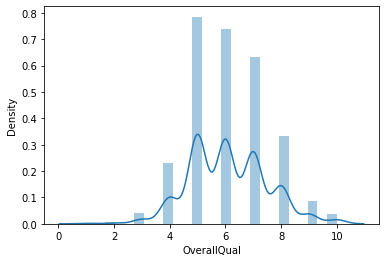

In [16]:
sns.distplot(train_df['OverallQual'])


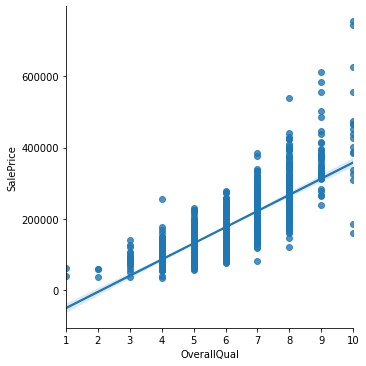

In [17]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train_df)

<AxesSubplot:xlabel='GrLivAreaLog', ylabel='Density'>

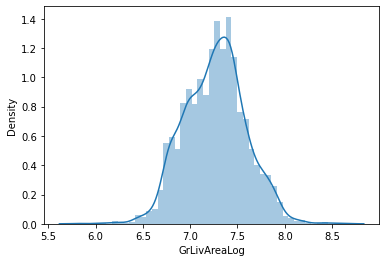

In [18]:
continous['GrLivAreaLog'] = np.log1p(alldata_df['GrLivArea'])
continous.drop(columns='GrLivArea',inplace=True)
sns.distplot(continous['GrLivAreaLog'])

<AxesSubplot:xlabel='LotAreaLog', ylabel='Density'>

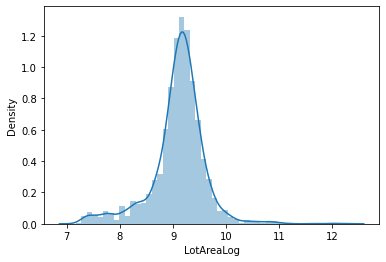

In [19]:
continous['LotAreaLog'] = np.log1p(alldata_df['LotArea'])
continous.drop(columns='LotArea',inplace=True)
sns.distplot(continous['LotAreaLog'])

<AxesSubplot:xlabel='LotAreaLog', ylabel='SalePrice'>

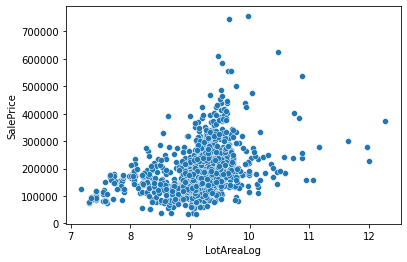

In [20]:

sns.scatterplot(x=continous['LotAreaLog'],y=train_df['SalePrice'])


## Let's split the train and test sets apart again

In [21]:
combined_df = categoric_encoded_df
combined_df = pd.concat([combined_df,continous ], axis=1)
combined_df.head()

,HasShed,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,PoolArea,MiscVal,LivLotRatio,Spaciousness,TotalOutsideSF,NeighborhoodLotMean,NeighborhoodSalePriceMean,TotalSF,GrLivAreaLog,LotAreaLog
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0.202367,213.750000,61,9999.752809,197965.773333,2566.0,7.444833,9.042040
1,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0.131458,210.333333,298,15482.208333,238772.727273,2524.0,7.141245,9.169623
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0.158756,297.666667,42,9999.752809,197965.773333,2706.0,7.488294,9.328212
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0.179791,245.285714,307,11650.106796,210624.725490,2473.0,7.448916,9.164401
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0.154137,244.222222,276,12975.577465,335295.317073,3343.0,7.695758,9.565284


In [22]:
from sklearn.model_selection import train_test_split

temp_train_df = combined_df.loc[0:1459,:]
X_test = combined_df.loc[1460:,:]

X = temp_train_df
y = train_df['SalePrice'] 

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)

X_train.columns


Index(['HasShed', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45',
       ...
       'PoolArea', 'MiscVal', 'LivLotRatio', 'Spaciousness', 'TotalOutsideSF',
       'NeighborhoodLotMean', 'NeighborhoodSalePriceMean', 'TotalSF',
       'GrLivAreaLog', 'LotAreaLog'],
      dtype='object', length=352)

In [23]:
X_test.isna().sum()


HasShed                      0
MSSubClass_120               0
MSSubClass_150               0
MSSubClass_160               0
MSSubClass_180               0
                            ..
NeighborhoodLotMean          0
NeighborhoodSalePriceMean    0
TotalSF                      0
GrLivAreaLog                 0
LotAreaLog                   0
Length: 352, dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import HuberRegressor
from sklearn import tree

model = RandomForestRegressor(n_estimators=115, min_samples_split=2, min_samples_leaf=1,random_state=22)
model.fit(X_train, y_train)




RandomForestRegressor(n_estimators=115, random_state=22)

### Training error

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_train)

error_rmse = mean_squared_error(y_train, y_pred, squared=False)
error_r2 = r2_score(y_train, y_pred)

print("RMSE: {}".format(round(error_rmse,2)))
print("R2 score: {}".format(round(error_r2,5)))


RMSE: 10355.67
R2 score: 0.98202


### Validation error

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_valid)

error_rmse = mean_squared_error(y_valid, y_pred, squared=False)
error_r2 = r2_score(y_valid, y_pred)

print("RMSE: {}".format(round(error_rmse,2)))
print("R2 score: {}".format(round(error_r2,5)))



RMSE: 28154.12
R2 score: 0.89666


### Predict for the test set

In [27]:
predictions = model.predict(X_test)

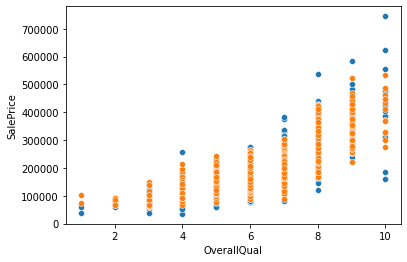

In [28]:

ax = sns.scatterplot(X_train["OverallQual"], y_train)
ax = sns.scatterplot(X_test["OverallQual"], predictions.flatten())


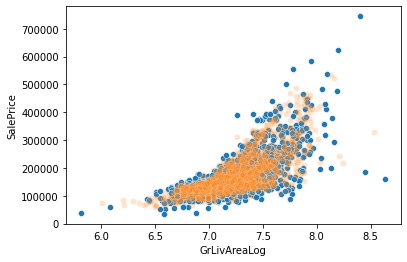

In [29]:
ax = sns.scatterplot(X_train["GrLivAreaLog"], y_train)
ax = sns.scatterplot(X_test["GrLivAreaLog"], predictions.flatten(), alpha=0.2)

### Create predictions file

In [30]:

submit = pd.DataFrame()
submit['Id'] = test_df['Id']
submit['SalePrice'] = predictions
submit.to_csv("forest_1.csv", index=False)


## Diagnostics

Keep model diagnostics code here

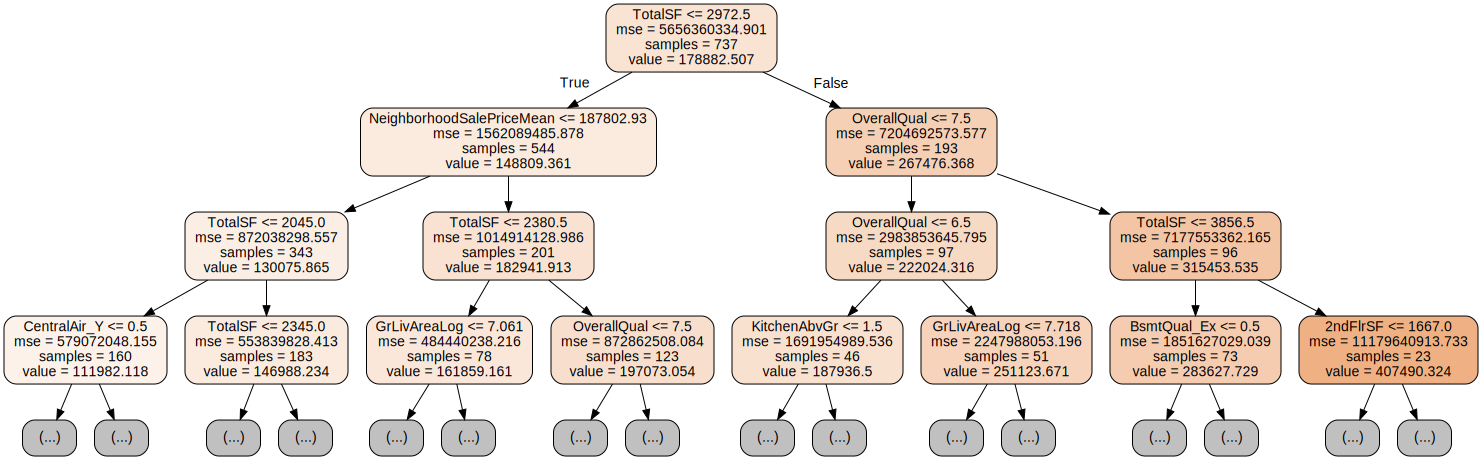

In [31]:
from sklearn import tree
tree1 = model.estimators_[102]
#tree1
#tree.plot_tree(tree1)

import graphviz 
dot_data = tree.export_graphviz(tree1, out_file=None,feature_names=X_test.columns, filled=True, rounded=True, max_depth=3, rotate=False) 
graph = graphviz.Source(dot_data) 

graph

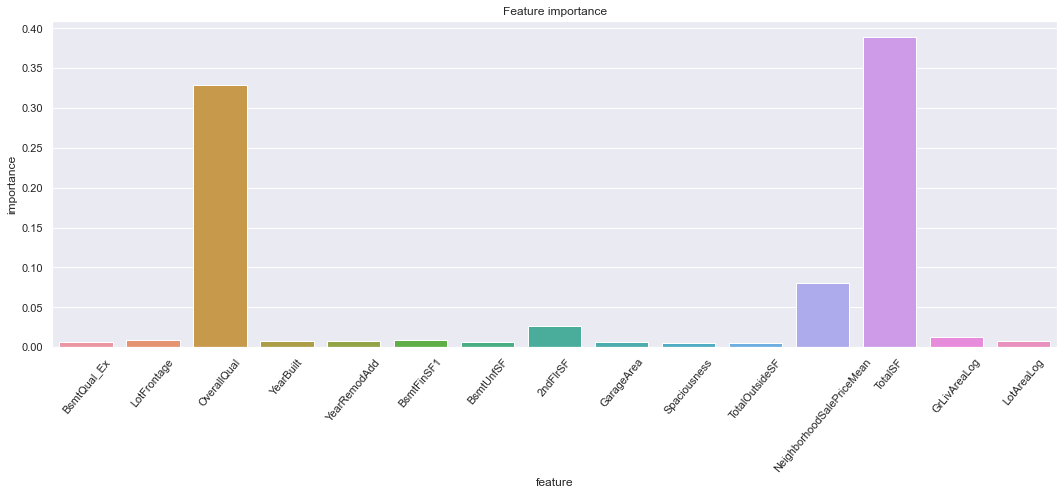

In [32]:
feat_importance_df = pd.DataFrame()
feat_importance_df['feature'] = X_train.columns.to_list()
feat_importance_df['importance'] = model.feature_importances_.tolist()

feat_importance_df[feat_importance_df['importance'] > 0.005]

most_important = feat_importance_df[feat_importance_df['importance'] > 0.005]

sns.set(rc={'figure.figsize':(18,6)})
sns.barplot( data=most_important, x="feature", y = "importance" ,ci = None)
plt.xticks(rotation=50)
text = plt.title("Feature importance")